In [454]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

In [455]:
df = pd.read_csv('zippedData/movie_metadata.csv')

In [456]:
df['gross'].isna().sum()

884

In [457]:
def split_genres(genre):
    return genre.split('|')[0]

df['genres'] = df['genres'].apply(split_genres)

In [458]:
df['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Film-Noir         1
Music             1
History           1
Game-Show         1
Name: genres, dtype: int64

In [459]:
df.groupby('genres')['gross'].mean().sort_values(ascending=False)

genres
Family         1.491605e+08
Adventure      8.632576e+07
Animation      8.531406e+07
Action         7.628989e+07
Musical        6.156660e+07
Mystery        4.882230e+07
Fantasy        3.778274e+07
Comedy         3.552488e+07
Biography      3.504501e+07
Horror         3.482828e+07
Crime          2.998996e+07
Drama          2.815144e+07
Sci-Fi         2.607184e+07
Romance        2.088634e+07
Western        1.199322e+07
Documentary    1.080287e+07
Music          3.419967e+06
Thriller       5.409697e+05
Film-Noir               NaN
Game-Show               NaN
History                 NaN
Name: gross, dtype: float64

In [460]:
df_genre_sub = df[df['genres'].isin(['Family', 'Action', 'Adventure', 'Animation', 'Musical'])]

In [461]:
top_100_directors_for_genre = list(df_genre_sub['director_name'].value_counts().index[0:100])

In [462]:
df_director_sub = df_genre_sub[df_genre_sub['director_name'].isin(top_100_directors_for_genre)]

In [463]:
df_director_sub.groupby('director_name').mean()['gross'].sort_values(ascending=False)

director_name
Joss Whedon          4.327217e+08
George Lucas         4.066046e+08
Christopher Nolan    3.334702e+08
Andrew Adamson       2.843617e+08
Peter Jackson        2.779949e+08
                         ...     
John Carpenter       1.808559e+07
Simon Wincer         1.793471e+07
Mark L. Lester       8.687778e+06
Hayao Miyazaki       8.035079e+06
Uwe Boll             3.042558e+06
Name: gross, Length: 100, dtype: float64

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [465]:
df_2 = df.copy()

In [466]:
df_3 = df.copy()

In [467]:
df_2.drop(columns=['actor_1_name', 'actor_3_name'], inplace=True)

In [468]:
df_2.rename(index=str, columns={"actor_2_name": "actor"}, inplace=True)

In [469]:
df.drop(columns=['actor_2_name', 'actor_3_name'], inplace=True)

In [470]:
df.rename(index=str, columns={"actor_1_name": "actor"}, inplace=True)

In [471]:
df_3.drop(columns=['actor_1_name', 'actor_2_name'], inplace=True)

In [472]:
df_3.rename(index=str, columns={"actor_3_name": "actor"}, inplace=True)

In [473]:
actors = pd.concat([df,df_2, df_3])

In [474]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15129 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      15072 non-null  object 
 1   director_name              14817 non-null  object 
 2   num_critic_for_reviews     14979 non-null  float64
 3   duration                   15084 non-null  float64
 4   director_facebook_likes    14817 non-null  float64
 5   actor_3_facebook_likes     15060 non-null  float64
 6   actor_1_facebook_likes     15108 non-null  float64
 7   gross                      12477 non-null  float64
 8   genres                     15129 non-null  object 
 9   actor                      15086 non-null  object 
 10  movie_title                15129 non-null  object 
 11  num_voted_users            15129 non-null  int64  
 12  cast_total_facebook_likes  15129 non-null  int64  
 13  facenumber_in_poster       15090 non-null  float64
 

In [475]:
assert actors['gross'][5043] == actors['gross'][0]

In [476]:
actors_genres_sub = actors[actors['genres'].isin(['Family', 'Action', 'Adventure', 'Animation', 'Musical'])]

In [477]:
actors_genres_sub['actor'].value_counts()[0:200]

Bruce Willis          27
Liam Neeson           21
Sylvester Stallone    20
Morgan Freeman        20
Jason Statham         20
                      ..
Bokeem Woodbine        4
Jordi Mollà            4
Bob Gunton             4
Meryl Streep           4
Tchéky Karyo           4
Name: actor, Length: 200, dtype: int64

In [478]:
top_200_actors_in_genre = list(actors_genres_sub['actor'].value_counts().index[0:200])

In [479]:
top_200_actors_in_genre

['Bruce Willis',
 'Liam Neeson',
 'Sylvester Stallone',
 'Morgan Freeman',
 'Jason Statham',
 'Dwayne Johnson',
 'Harrison Ford',
 'Johnny Depp',
 'Nicolas Cage',
 'Angelina Jolie Pitt',
 'James Franco',
 'Steve Buscemi',
 'Bill Murray',
 'Hugh Jackman',
 'Matt Damon',
 'Vin Diesel',
 'Gerard Butler',
 'Gary Oldman',
 'Tom Cruise',
 'Scarlett Johansson',
 'Paul Walker',
 'Christian Bale',
 'J.K. Simmons',
 'Brad Pitt',
 'Chris Hemsworth',
 'Jet Li',
 'Robert De Niro',
 'Will Smith',
 'Salma Hayek',
 'Jim Broadbent',
 'Djimon Hounsou',
 'Robert Downey Jr.',
 'Milla Jovovich',
 'Charlize Theron',
 'Christopher Lee',
 'Denzel Washington',
 'Desmond Llewelyn',
 'Ray Winstone',
 'John Ratzenberger',
 'Josh Hutcherson',
 'Ryan Reynolds',
 'Natalie Portman',
 'Anthony Hopkins',
 'Jeff Bridges',
 'Steve Coogan',
 'Leonard Nimoy',
 'Brendan Fraser',
 'Delroy Lindo',
 'Joseph Gordon-Levitt',
 'Mako',
 'Cary-Hiroyuki Tagawa',
 'Kristen Stewart',
 'Jason Flemyng',
 'Scott Glenn',
 'Chris Evans',
 

In [480]:
actors_genres_sub = actors_genres_sub[actors_genres_sub['actor'].isin(top_200_actors_in_genre)]

In [481]:
actors_genres_sub.groupby('actor').mean()['gross'].sort_values(ascending=False)

actor
Robert Downey Jr.      3.330767e+08
Robert Pattinson       2.939566e+08
Jennifer Lawrence      2.838172e+08
Kenny Baker            2.756464e+08
Kevin Dunn             2.734365e+08
                           ...     
Clifton Collins Jr.    2.497959e+07
Michael Jai White      2.343321e+07
Ashley Scott           2.078217e+07
Minnie Driver          2.047346e+07
Andy Lau               7.572250e+06
Name: gross, Length: 200, dtype: float64

In [482]:

actors_genres_sub.groupby('actor').mean()['imdb_score'].sort_values(ascending=False)

actor
Kenny Baker          8.225000
John Ratzenberger    7.890000
Tom Hanks            7.737500
Albert Finney        7.700000
Orlando Bloom        7.677778
                       ...   
Frankie Muniz        5.183333
Michael Jai White    5.085714
Udo Kier             4.933333
Alexa PenaVega       4.928571
Taylor Lautner       4.900000
Name: imdb_score, Length: 200, dtype: float64

In [483]:
df_keywords1 = pd.read_csv('zippedData/movie_metadata.csv')

In [552]:
def split_keyword1(keywords):
      return keywords.split('|')[0]

def split_keyword2(keywords):
        if len(keywords.split('|')) > 1:
            return keywords.split('|')[1]
        else:
            return "No second keyword"

def split_keyword3(keywords):
        if len(keywords.split('|')) > 2:
            return keywords.split('|')[2]
        else:
            return "No third keyword"

def split_keyword4(keywords):
        if len(keywords.split('|')) > 3:
            return keywords.split('|')[3]
        else:
            return "No fourth keyword"

def split_keyword5(keywords):
        if len(keywords.split('|')) > 4:
            return keywords.split('|')[4]
        else:
            return "No fifth keyword"

In [553]:
df_keywords1.dropna(subset=['plot_keywords'], inplace=True)
df_keywords1['plot_keywords'] = df_keywords1['plot_keywords'].apply(split_keyword1)

In [554]:
df_keywords2 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords2.dropna(subset=['plot_keywords'], inplace=True)
df_keywords2['plot_keywords'] = df_keywords2['plot_keywords'].apply(split_keyword2)

In [555]:
df_keywords3 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords3.dropna(subset=['plot_keywords'], inplace=True)
df_keywords3['plot_keywords'] = df_keywords3['plot_keywords'].apply(split_keyword3)

In [556]:
df_keywords4 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords4.dropna(subset=['plot_keywords'], inplace=True)
df_keywords4['plot_keywords'] = df_keywords4['plot_keywords'].apply(split_keyword4)

In [557]:
df_keywords5 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords5.dropna(subset=['plot_keywords'], inplace=True)
df_keywords5['plot_keywords'] = df_keywords5['plot_keywords'].apply(split_keyword5)

In [558]:
df_keywords = pd.concat([df_keywords1,df_keywords2, df_keywords3, df_keywords4, df_keywords5])

In [559]:
df_keywords

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


In [560]:
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No second keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No third keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No fourth keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No fifth keyword"] 

In [561]:
x= list(df_keywords['plot_keywords'].value_counts().index[0:10])
y= list(df_keywords['plot_keywords'].value_counts().values[0:10])

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


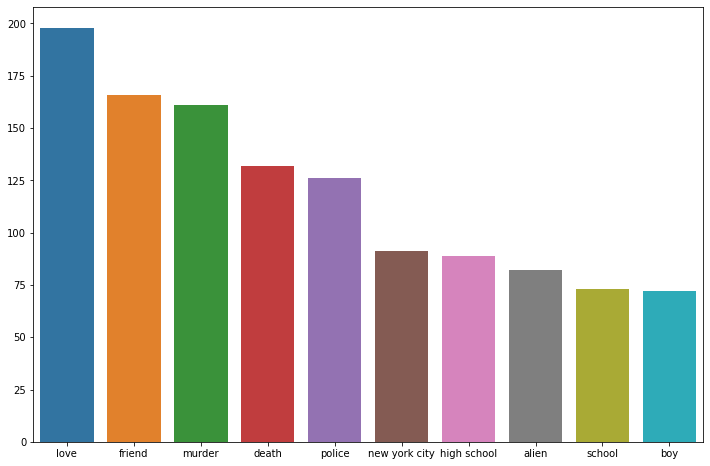

In [570]:
fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)

In [571]:
top_100_keywords = list(df_keywords['plot_keywords'].value_counts().index[0:100])

In [572]:
df_keyword_sub

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.058679,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301.956980,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
19,Color,Barry Sonnenfeld,451.0,106.0,188.0,718.0,Michael Stuhlbarg,10000.0,179.020854,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,341.0,English,USA,PG-13,225000000.0,2012.0,816.0,6.8,1.85,40000
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65.173160,Action|Adventure|Sci-Fi|Thriller,...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000
31,Color,Sam Raimi,300.0,135.0,0.0,4000.0,James Franco,24000.0,373.377893,Action|Adventure|Fantasy|Romance,...,1303.0,English,USA,PG-13,200000000.0,2004.0,11000.0,7.3,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Color,Travis Legge,1.0,90.0,138.0,138.0,Suzi Lorraine,370.0,NaN,Comedy|Romance,...,3.0,English,USA,NaN,22000.0,2013.0,184.0,3.3,1.78,200
5019,Color,Marcus Nispel,43.0,91.0,158.0,265.0,Brittany Curran,630.0,NaN,Horror|Mystery|Thriller,...,33.0,English,USA,R,NaN,2015.0,512.0,4.6,1.85,0
5025,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,0.180483,Comedy|Crime|Horror,...,183.0,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.136007,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171


In [581]:
df_keyword_sub = df_keywords[df_keywords['plot_keywords'].isin(top_100_keywords)]
df_keyword_sub = df_keyword_sub.dropna(subset=['gross'])

In [582]:
df_keyword_sub['gross'] = df_keyword_sub['gross'].apply(lambda x: x/1000000)
df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False)

plot_keywords
superhero                   136.025491
princess                    118.124350
magic                       111.002026
battle                      101.337732
monster                      97.822698
                               ...    
gay                          20.367470
female frontal nudity        19.785387
box office flop              18.272964
title directed by female     16.599813
sex                          16.067441
Name: gross, Length: 100, dtype: float64

In [586]:
x = df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False).index[0:10]
y = df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False).values[0:10]

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


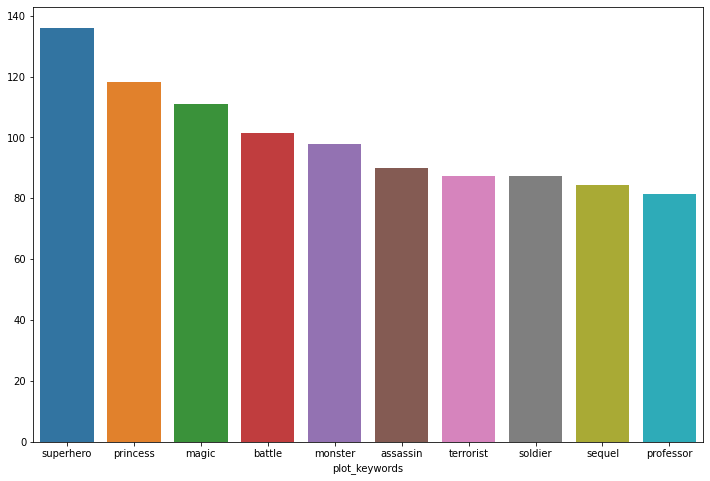

In [587]:
fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)